In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import numpy as np
data=pd.read_csv('./dataset_train_4_0to200.csv')

In [2]:
# Select the relevant columns for Prophet: 'Delivery Date', 'Settlement Point Price'
prophet_data = data[['Delivery Date', 'Settlement Point Price']]
prophet_data.columns = ['ds', 'y']

In [3]:
# Convert the 'ds' column to pandas datetime
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_34512\1876174920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])


In [4]:
# Split the data into training and testing sets (80% for training, 20% for testing)
train, test = train_test_split(prophet_data, test_size=0.2, random_state=42)

In [5]:
# Create and fit the Prophet model
model = Prophet()
model.fit(train)


13:10:29 - cmdstanpy - INFO - Chain [1] start processing
13:10:33 - cmdstanpy - INFO - Chain [1] done processing


In [6]:


# Make predictions on the test set
forecast = model.predict(test.drop(columns='y'))
# Evaluate the model
mse = mean_squared_error(test['y'], forecast['yhat'])
r2 = r2_score(test['y'], forecast['yhat'])


In [7]:

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1312.7792003499176
R-squared (R2) Score: -0.012098267605599622


In [10]:

# df[df['column_name'].notnull()]['column_name']

# error_f = np.round(test['y'],2)-np.round(forecast['yhat'],2)

error_f = np.round(forecast['yhat'],2).sub(np.round(test['y'],2), fill_value=0)
# Extract non-NaN values from 'error_f'
# error_f = error_f[non_nan_indices]
error_f=error_f.reset_index()[0]
i=0
count=0
print(error_f[0])
for i in range(len(error_f)):
    if ((error_f[i])>5) or ((error_f[i]<-5)):
        count=count+1
a = len(forecast['yhat']) - count
accuracy = (a/len(forecast['yhat']))*100
print('accuracy:', accuracy)

24.31
accuracy: -69.19745958429561


In [11]:
for j in range(1,11):
    i=0
    count=0
    for i in range(len(error_f)):
        if ((error_f[i])>j) or ((error_f[i]<-j)):
            count=count+1
    a = len(forecast['yhat']) - count
    accuracy = (a/len(forecast['yhat']))*100
    print("accuracy: with threshold of %i"%j," is %.2f"%accuracy)

accuracy: with threshold of 1  is -77.70
accuracy: with threshold of 2  is -75.48
accuracy: with threshold of 3  is -73.35
accuracy: with threshold of 4  is -70.94
accuracy: with threshold of 5  is -69.20
accuracy: with threshold of 6  is -67.60
accuracy: with threshold of 7  is -65.91
accuracy: with threshold of 8  is -64.64
accuracy: with threshold of 9  is -63.54
accuracy: with threshold of 10  is -62.11


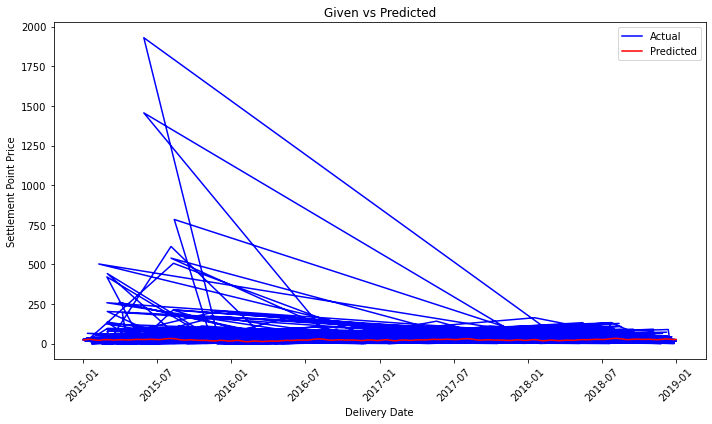

In [12]:

# Plot the given vs predicted graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test['ds'], test['y'], label='Actual', color='b')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='r')
ax.legend()
ax.set_xlabel('Delivery Date')
ax.set_ylabel('Settlement Point Price')
plt.title('Given vs Predicted')
plt.xticks(rotation=45)
plt.tight_layout()